# Description :- Predict if a passenger will survival or not inTitanic 

## Our workflow is 
1. import dataset
2. Pre-process
3. Analysis
4. Split data set
5. Train model
6. Evaluate model

### import libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Load dataset 
df=sns.load_dataset('titanic')

In [40]:
# first look of dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
# gets shape
df.shape

(891, 15)

In [42]:
# gets some statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- here column of age showing some missing data point 
- fare and age has some outlllier

In [43]:
# check how many null value are there
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
# Drop some columns
df=df.drop(['class','embark_town','who','adult_male','deck','alive','alone'],axis=1)

In [46]:
#New shape of dataframe
df.shape

(891, 8)

# Analyze

In [48]:
#gets counts of no of survival
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

E:\python Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


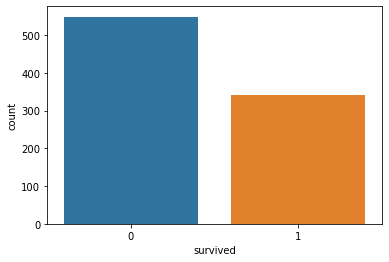

In [49]:
#visualize it
sns.countplot(df['survived'])
plt.show()

In [50]:
# Look survival rate with sex column
df.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


- look this and see 74 % female survived and only 18 % male

In [52]:
#look survival rate with sex and class
df.pivot_table('survived',index='sex',columns='pclass')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


- in female/male 1 class have more chance to survived

<AxesSubplot:xlabel='pclass', ylabel='survived'>

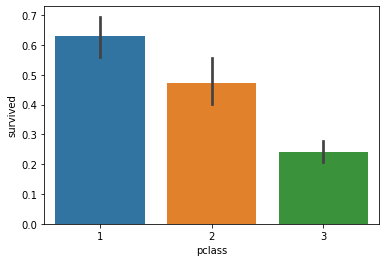

In [57]:
# plot survived rate with each class
sns.barplot(x='pclass',y='survived',data=df)

In [61]:
# loook for which age category has more survived
age=pd.cut(df['age'],[0,18,30,50,80])
df.pivot_table('survived',['sex',age],'pclass')

pclass                  1         2         3
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 30]  0.958333  0.900000  0.500000
       (30, 50]  0.972973  0.925926  0.272727
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 30]  0.428571  0.027027  0.147541
       (30, 50]  0.448980  0.114286  0.126761
       (50, 80]  0.192308  0.083333  0.000000

- #### in female 1-class age group 10-80 Very high chance to survived,2-class age less than 50 high chance to survived
- #### in male 1- class only 0-18 age group have high chance to survived then very less

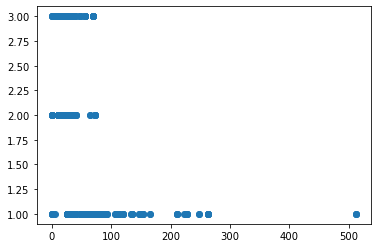

In [66]:
# lets check  price v/s class
plt.scatter(y=df['pclass'],x=df['fare'])
plt.show()

- in this graph tell us Who pay >100 chance are more to survived 
- Because in first class Very high chances to survived 

In [67]:
#check the missing value
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

# Deal with missing values

In [68]:
# Remove the missing rows 
df=df.dropna(subset=['age','embarked'])

In [69]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [70]:
# new shpae of our dataframe
df.shape

(712, 8)

In [71]:
# see type 
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [74]:
# using label encoder 
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

# for sex column
df.iloc[:,2]=label.fit_transform(df.iloc[:,2].values)

# for Embarked column
df.iloc[:,7]=label.fit_transform(df.iloc[:,7].values)

E:\python Data science\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [75]:
# lets now see type 
df.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [79]:
# See unique value
print(df['sex'].unique())
print(df['embarked'].unique())

[1 0]
[2 0 1]


## Lets split dataset

In [81]:
X=df.iloc[:,1:8].values
y=df.iloc[:,0].values

In [82]:
# see the Independent variable
X

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 1.    ,  0.    , 19.    , ...,  0.    , 30.    ,  2.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  1.    ]])

In [83]:
#this is our dependent variable
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [86]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## Make model

In [100]:
def models(X_train,Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression()
    log.fit(X_train,y_train)
    
    
    #Using K-Neigbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    
    #Useing Svm
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear')
    svc_lin.fit(X_train,y_train)
    
    #Useing GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,y_train)
    
    #Useing DecisionTree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy' ,random_state=0)
    tree.fit(X_train,y_train)
    
    #useing randomForest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy' ,random_state=0)
    forest.fit(X_train,y_train)
    
    #Print the accuracy of each model
    print('[0] Logistic train accuracy: ' , log.score(X_train,y_train))
    print('[1] K-Neighbour train accuracy: ' , knn.score(X_train,y_train))
    print('[2] SVC train accuracy: ' , svc_lin.score(X_train,y_train))
    print('[3] GaussionNB train accuracy: ' , gauss.score(X_train,y_train))
    print('[4] decision Tree train accuracy: ' , tree.score(X_train,y_train))
    print('[5] Random Forest train accuracy: ' , forest.score(X_train,y_train))
    
    
    return log ,knn ,svc_lin , gauss , tree ,forest

In [101]:
# gets train all the model
model=models(X_train,y_train)

[0] Logistic train accuracy:  0.7978910369068541
[1] K-Neighbour train accuracy:  0.8664323374340949
[2] SVC train accuracy:  0.7768014059753954
[3] GaussionNB train accuracy:  0.8031634446397188
[4] decision Tree train accuracy:  0.9929701230228472
[5] Random Forest train accuracy:  0.9753954305799648


In [107]:
# show the confussion metrics
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm=confusion_matrix(y_test,model[i].predict(X_test))
    
    # TN,FN,TP,FP
    TN,FP,FN,TP=confusion_matrix(y_test,model[i].predict(X_test)).ravel()
    test_score=(TP+TN)/(TP+TN+FP+FN)
    print(cm)
    print('model [{}] testing accuracy:"{}"'.format(i,test_score))
    print()

[[75  7]
 [19 42]]
model [0] testing accuracy:"0.8181818181818182"

[[67 15]
 [20 41]]
model [1] testing accuracy:"0.7552447552447552"

[[70 12]
 [18 43]]
model [2] testing accuracy:"0.7902097902097902"

[[69 13]
 [27 34]]
model [3] testing accuracy:"0.7202797202797203"

[[54 28]
 [12 49]]
model [4] testing accuracy:"0.7202797202797203"

[[73  9]
 [14 47]]
model [5] testing accuracy:"0.8391608391608392"



# let's check Random data 

In [109]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.25,2


In [112]:
my_survival=[[1,1,30,0,0,400,2]]

#scale data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
my_survival_scale=sc.fit_transform(my_survival)

# predict useing randomforest

pred=model[5].predict(my_survival_scale)
print(pred)

if pred==0:
    print('oh no!')
else:
    print('Nice! you survived')

[0]
oh no!


### THE END